In [27]:
import numpy as np
import math

# RF gini
confusion_matrix = np.asarray([
 [699,   2,   0,   0,   0,   0,   0,   1,   5],
 [ 14, 432,   0,   5,   0,   0,   0,   1,   5],
 [  1,   1, 137,   0,   0,   2,   0,   0,   0],
 [  0,   2,   0,  84,   0,   0,   0,   4,   2],
 [  0,   0,   0,   0,  30,   0,   1,   1,   0],
 [  0,   5,   1,   0,   0,  92,   0,   1,   0],
 [  0,   2,   0,   4,   0,   6,  42,   0,   3],
 [  5,   5,   2,   2,   0,   0,   0, 196,   5],
 [ 28,  18,   0,   3,   0,   0,   0,   6, 130]])

# RF entropy
# confusion_matrix = np.asarray([
#  [694,   2,   0,   0,   0,   0,   0,   1,  10],
#  [ 13, 432,   0,   4,   0,   0,   0,   2,   6],
#  [  1,   1, 137,   0,   0,   2,   0,   0,   0],
#  [  0,   3,   0,  82,   0,   0,   0,   5,   2],
#  [  0,   1,   0,   0,  30,   0,   1,   0,   0],
#  [  0,   7,   1,   0,   0,  91,   0,   0,   0],
#  [  1,   3,   0,   3,   0,   3,  44,   0,   3],
#  [  4,  10,   2,   2,   0,   0,   0, 194,   3],
#  [ 27,  16,   0,   2,   0,   0,   0,   5, 135]])

# DT entropy
# confusion_matrix = np.asarray([
#  [668,  19,   0,   0,   0,   0,   0,   3,  17],
#  [ 29, 409,   0,   1,   1,   2,   2,   6,   7],
#  [  2,   0, 138,   0,   0,   0,   0,   0,   1],
#  [  0,   6,   0,  71,   0,   0,   6,   6,   3],
#  [  0,   2,   0,   1,  28,   0,   1,   0,   0],
#  [  1,   3,   1,   0,   0,  89,   2,   0,   3],
#  [  0,   4,   0,   3,   0,   2,  46,   1,   1],
#  [  8,   4,   0,   1,   0,   0,   0, 197,   5],
#  [ 47,  21,   1,   5,   0,   0,   1,   3, 107]])

# DT gini
# confusion_matrix = np.asarray([
#  [669,  13,   0,   0,   0,   0,   0,   5,  20],
#  [ 16, 418,   0,   5,   1,   1,   0,   2,  14],
#  [  0,   0, 138,   0,   0,   0,   0,   1,   2],
#  [  0,   2,   0,  81,   1,   0,   2,   3,   3],
#  [  0,   0,   0,   0,  31,   0,   1,   0,   0],
#  [  1,   5,   2,   0,   0,  87,   1,   0,   3],
#  [  0,   1,   1,   3,   0,   1,  44,   0,   7],
#  [  6,  12,   4,   1,   0,   0,   0, 188,   4],
#  [ 41,  21,   1,   4,   0,   0,   0,   2, 116]])

# pandas
# confusion_matrix = np.asarray([
#  [706,   0,   0,   0,   0,   0,   0,   0,   1],
#  [178,   0,   0,   0,   0,   0,   0,   0, 279],
#  [  4,   0, 129,   0,   0,   0,   0,   0,   8],
#  [  0,   0,   0,   0,   0,   0,   0,   0,  92],
#  [  0,   0,   0,   0,   0,   0,   0,   0,  32],
#  [  0,   0,   0,   0,   0,   0,   0,   0,  99],
#  [  1,   0,   0,   0,   0,   0,   0,   0,  56],
#  [127,   0,   6,   0,   0,   0,   0,   0,  82],
#  [134,   0,   0,   0,   0,   0,   0,   0,  51]])

# SVM rbf
# confusion_matrix = np.asarray([
#  [663,  33,   1,   0,   0,   0,   0,   0,  10],
#  [ 14, 421,   0,   1,   0,   0,   0,   7,  14],
#  [  1,   0, 136,   0,   0,   3,   0,   1,   0],
#  [  1,   2,   0,  67,   0,   3,   1,  18,   0],
#  [  1,   0,   0,   0,  30,   0,   1,   0,   0],
#  [  6,   3,   0,   0,   0,  90,   0,   0,   0],
#  [  1,   0,   0,   1,   0,  19,  31,   2,   3],
#  [ 12,  35,   2,   3,   1,   0,   0, 158,   4],
#  [ 24,  32,   0,   2,   0,   0,   1,  10, 116]])


# SVM sigmoid
# confusion_matrix = np.asarray([
#  [642,  44,   1,   0,   0,   3,   0,   3,  14],
#  [ 22, 414,   1,   1,   0,   0,   0,   7,  12],
#  [  1,   0, 136,   0,   0,   3,   0,   1,   0],
#  [  2,   4,   0,  69,   0,   5,   0,  10,   2],
#  [  2,   0,   0,   0,  29,   0,   1,   0,   0],
#  [  5,   4,   0,   0,   0,  90,   0,   0,   0],
#  [  1,   0,   0,   1,   0,  20,  32,   0,   3],
#  [ 25,  44,   2,   4,   1,   0,   0, 135,   4],
#  [ 27,  44,   0,   1,   0,   0,   1,  16,  96]])


# Normalize?
# From original
# with np.errstate(all="ignore"):
#     if normalize == "true":
#         cm = cm / cm.sum(axis=1, keepdims=True)
#     elif normalize == "pred":
#         cm = cm / cm.sum(axis=0, keepdims=True)
#     elif normalize == "all":
#         cm = cm / cm.sum()
#     cm = np.nan_to_num(cm)

confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=0, keepdims=True)
confusion_matrix = np.round(confusion_matrix, decimals=2)

for i in range(len(confusion_matrix)):
  for j in range(len(confusion_matrix[i])):
    if math.isnan(confusion_matrix[i][j]):
      confusion_matrix[i][j] = 0

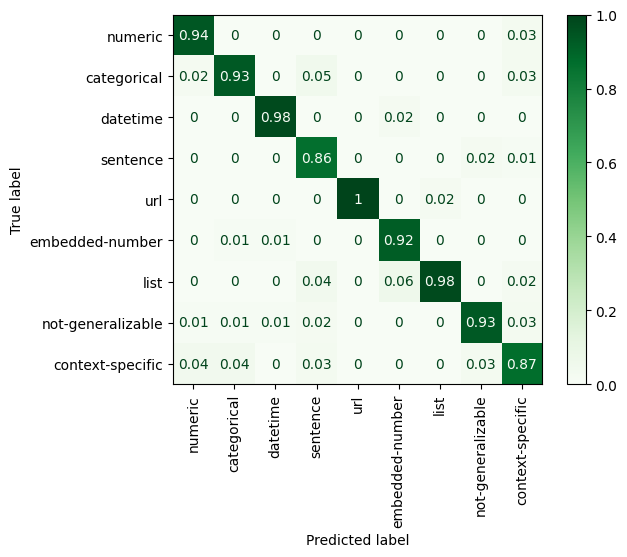

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


LABELS = np.asarray([
    'numeric',
    'categorical',
    'datetime',
    'sentence',
    'url',
    'embedded-number',
    'list',
    'not-generalizable',
    'context-specific'
])

disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=LABELS)
disp.plot(xticks_rotation="vertical", cmap=plt.cm.Greens)